<a href="https://colab.research.google.com/github/AzizKorbi/project/blob/master/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Detection Project using NLTK & SK-Learn


In this Project we will discuss a higher level overview of the basics of NLP, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

**Requirements: You will need to have NLTK installed**

# **Imports**

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Download Stopwords**

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?


# Get the Data

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

In [ ]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [ ]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

In [ ]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [ ]:
messages.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [ ]:
messages['length'] = messages['message'].apply(len)

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization


<AxesSubplot:ylabel='Frequency'>

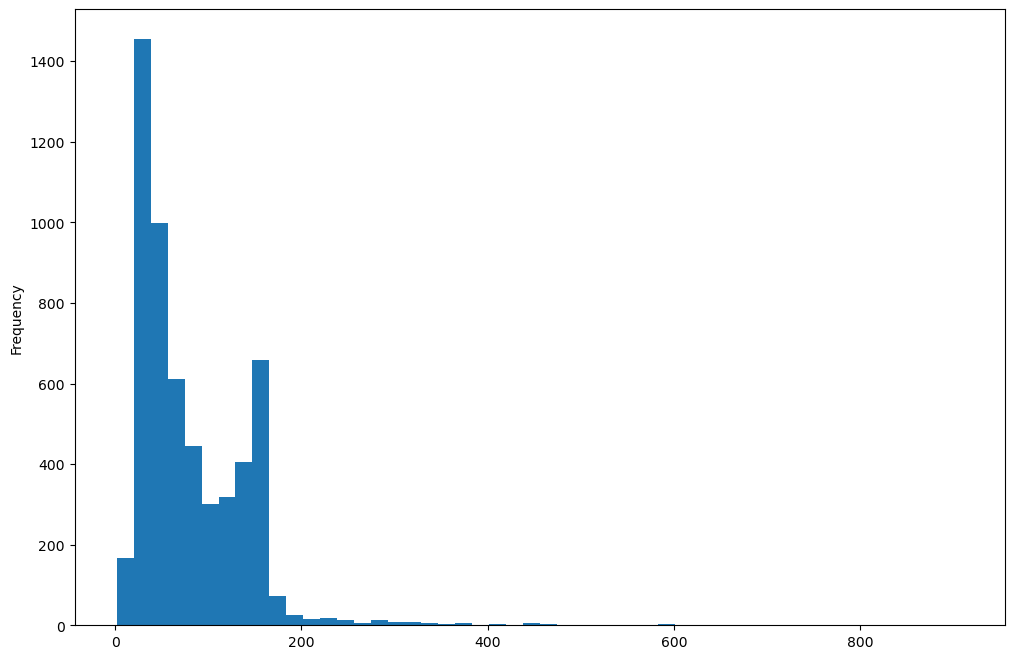

In [ ]:
fig = plt.figure(figsize=(12,8))
messages['length'].plot(bins=50, kind='hist')

In [ ]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
# There is a message that has 910 characters, which is an outlier

In [ ]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

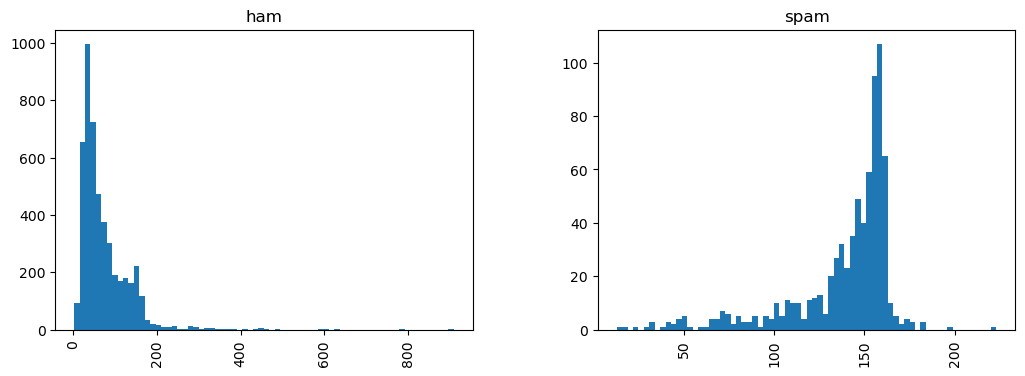

In [ ]:
messages.hist(column='length', by='label', bins=70,figsize=(12,4))

# Text Pre-processing

In [ ]:
import string

mess = 'This is unbelievable! Leo Messi has signed as a new inter Miami player.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

In [ ]:
nopunc

['T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'u',
 'n',
 'b',
 'e',
 'l',
 'i',
 'e',
 'v',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'L',
 'e',
 'o',
 ' ',
 'M',
 'e',
 's',
 's',
 'i',
 ' ',
 'h',
 'a',
 's',
 ' ',
 's',
 'i',
 'g',
 'n',
 'e',
 'd',
 ' ',
 'a',
 's',
 ' ',
 'a',
 ' ',
 'n',
 'e',
 'w',
 ' ',
 'i',
 'n',
 't',
 'e',
 'r',
 ' ',
 'M',
 'i',
 'a',
 'm',
 'i',
 ' ',
 'p',
 'l',
 'a',
 'y',
 'e',
 'r']

In [ ]:
# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [ ]:
nopunc

'This is unbelievable Leo Messi has signed as a new inter Miami player'

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Show some stop words
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
# Show some stop words in ARABIC language
stopwords.words('arabic')[0:10]

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي']

In [ ]:
nopunc.split()

['This',
 'is',
 'unbelievable',
 'Leo',
 'messi',
 'has',
 'signed',
 'as',
 'new',
 'inter',
 'Miami',
 'player']

In [ ]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

['unbelievable', 'Leo', 'Messi', 'signed', 'new', 'inter', 'Miami', 'player']

In [ ]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

 Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th>
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>3</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word M Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# May take a while...
vectorizer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print('M : ',len(vectorizer.vocabulary_))

M :  11425


In [ ]:
message7 = messages['message'][6]
print(message7)

Even my brother is not like to speak with me. They treat me like aids patent.


In [ ]:
bow7 = vectorizer.transform([message7])
print(bow7,'\n')
print(bow7.shape)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1 

(1, 11425)


In [ ]:
vect_messages = vectorizer.transform(messages['message'])

In [ ]:
print('Shape of Sparse Matrix: ', vect_messages.shape)
print('Amount of Non-Zero occurences: ', vect_messages.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [ ]:
sparsity = (100.0 * vect_messages.nnz / (vect_messages.shape[0] * vect_messages.shape[1]))
print('sparsity: {}'.format(sparsity),'%')

sparsity: 0.07940295412668218 %


In [ ]:
vect_messages

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

### TF-IDF
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word food appears 7 times.

The term frequency (i.e., tf) for food is then (7 / 100) = 0.07. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as
log(1,000,000 / 25,000)= 40. Thus, the Tf-idf weight is the product of these quantities: 0.07 * 40 = 2.8 .


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(vect_messages)

In [ ]:
messages_tfidf = tfidf_transformer.transform(vect_messages)
print(messages_tfidf.shape)

(5572, 11425)


# Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

# Training the model

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(msg_train, label_train)

In [ ]:
pred = spam_detect_model.predict(msg_test)

In [ ]:
pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1004
        spam       0.73      1.00      0.84       111

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



# Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('spam_detect_model', MultinomialNB()),
])

## More Resources

Check out the links below for more info on Natural Language Processing:

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

[NLTK Documentation](https://www.nltk.org/)